In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack

# Load data
df = pd.read_csv('clean_tmdb_movies.csv')

# Function to create combined features
def create_combined_features(row):
    return (
            str(row['genre_names']) + ' ' +
            str(row['overview']) + ' ' +
            str(row['cast']) + ' ' +
            str(row['crew']) + ' ' +
            str(row['production_companies']) + ' ' +
            str(row['production_countries']) + ' ' +
            str(row['spoken_languages']) + ' ' +
            str(row['original_language'])
    )

df['combined_features'] = df.apply(create_combined_features, axis=1)

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
feature_matrix = vectorizer.fit_transform(df['combined_features'])

genre_vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
genre_matrix = genre_vectorizer.fit_transform(df['genre_names'])

feature_matrix = hstack([feature_matrix, genre_matrix])

cosine_sim = cosine_similarity(feature_matrix, feature_matrix)

def get_recommendations(title, cosine_sim=cosine_sim):
    title = title.lower()  # Convert to lowercase

    if title not in df['title'].str.lower().values:
        return f"Movie '{title}' not found in the database."

    idx = df[df['title'].str.lower() == title].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Skip the movie itself

    movie_indices = [i[0] for i in sim_scores]

    return df.iloc[movie_indices][['title', 'id']].to_dict(orient='records')

# Recursive recommendation loop
def recommend_movies():
    while True:
        movie_title = input("Enter a movie title (or type 'exit' to quit): ")
        if movie_title.lower() == 'exit':
            print("Exiting the recommendation system. Goodbye!")
            break

        recommendations = get_recommendations(movie_title)

        if isinstance(recommendations, str):
            print(recommendations)
        else:
            print(f"Recommendations for '{movie_title}':")
            for rec in recommendations:
                print(f"Title: {rec['title']}, ID: {rec['id']}")

# Start the recommendation system
recommend_movies()

Recommendations for 'Parasite':
Title: Joint Security Area, ID: 2440
Title: Lady Vengeance, ID: 4550
Title: Miracle in Cell No. 7, ID: 158445
Title: Tunnel, ID: 390497
Title: The Housemaid, ID: 45202
Title: Kingdom: Ashin of the North, ID: 845222
Title: Burning, ID: 491584
Title: Wild Tales, ID: 265195
Title: The Isle, ID: 8653
Title: Time to Hunt, ID: 571785


KeyboardInterrupt: Interrupted by user

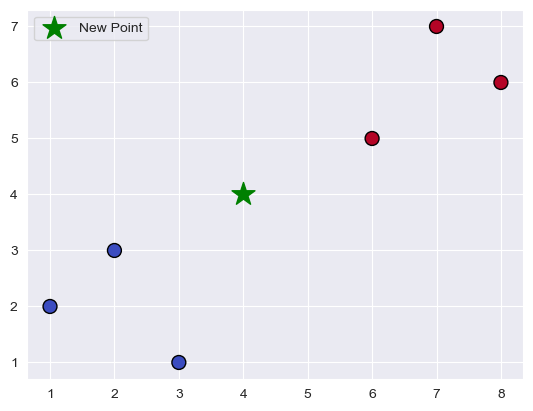

Предсказанный класс для новой точки: 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Данные (две группы: красные и синие)
X = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
y = np.array([0, 0, 0, 1, 1, 1])  # 0 - красные, 1 - синие

# Новая точка
X_new = np.array([[4, 4]])

# Создаем и обучаем k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

# Предсказание класса
prediction = knn.predict(X_new)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
plt.scatter(X_new[:, 0], X_new[:, 1], c='green', marker='*', s=300, label="New Point")
plt.legend()
plt.show()

print(f"Предсказанный класс для новой точки: {prediction[0]}")
